<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> Low level implementation of a solution by gradient descent. Basic and stochastic approach.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [1]:
import numpy as np
import sys

sys.path.append('..')
import fidle.pwk as pwk

from modules.RegressionCooker import RegressionCooker 

# ---- Init Fidle stuffs
#
datasets_dir = pwk.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(pwk)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.17
Notebook id          : GRAD1
Run time             : Monday 01 March 2021, 18:40:46
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Monday 01 March 2021, 18:40:46


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


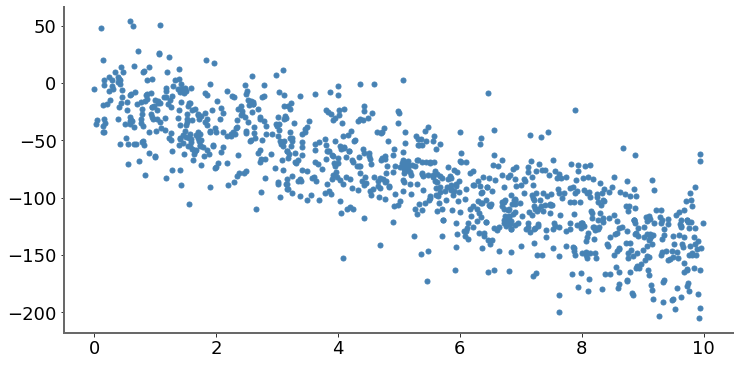

X                :      mean=   5.004  std=   2.887    min=   0.000    max=  10.000
Y                :      mean= -78.036  std=  49.192    min=-258.566    max=  95.948


In [2]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [3]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   5.004  std=   2.887    min=   0.000    max=  10.000
X normalized     :      mean=  -0.000  std=   1.000    min=  -1.733    max=   1.731


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +14.468   -7.340  +1.644   -3.596  -0.016


   20   +6.628   -4.900  +1.097   -2.401  -0.284


   40   +3.134   -3.271  +0.733   -1.603  -0.463


   60   +1.577   -2.184  +0.489   -1.070  -0.582


   80   +0.883   -1.458  +0.327   -0.714  -0.662


  100   +0.573   -0.973  +0.218   -0.477  -0.715


  120   +0.435   -0.650  +0.146   -0.318  -0.751


  140   +0.374   -0.434  +0.097   -0.213  -0.774


  160   +0.346   -0.290  +0.065   -0.142  -0.790


  180   +0.334   -0.193  +0.043   -0.095  -0.801


  200   +0.329   -0.129  +0.029   -0.063  -0.808


<br>**Visualization :**

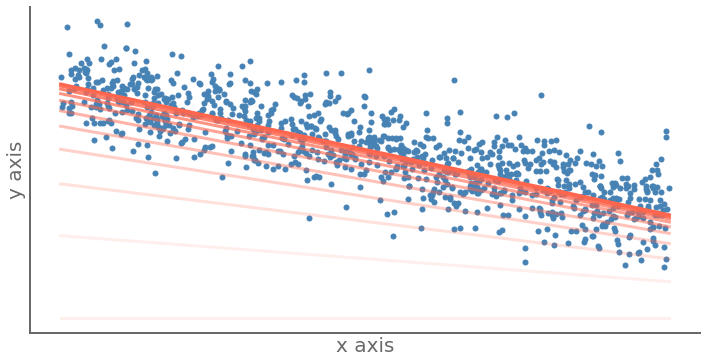

<br>**Loss :**

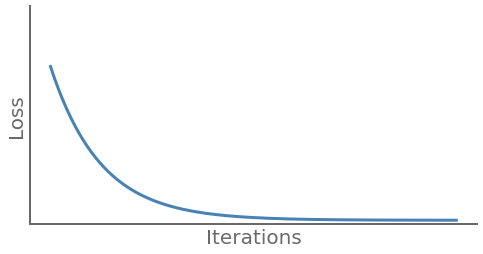

In [4]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.414   -3.223  -1.331   -0.003  -0.758
    1   +0.509   -1.265  -5.226   +0.024  -0.815
    2   +0.403   -0.509  +1.738   +0.025  -0.824
    3   +0.223   -4.433  -2.696   +0.003  -0.814
    4   +0.300   -5.126  +0.511   +0.057  -0.784
    5   +0.342   +5.415  +4.915   +0.001  -0.803
    6   +0.459   -0.127  -6.173   -0.015  -0.824
    7   +0.343   +1.987  +4.441   -0.001  -0.825
    8   +0.217   -0.572  -6.593   +0.015  -0.817
    9   +0.501   -4.101  -4.573   +0.006  -0.818


<br>**Visualization :**

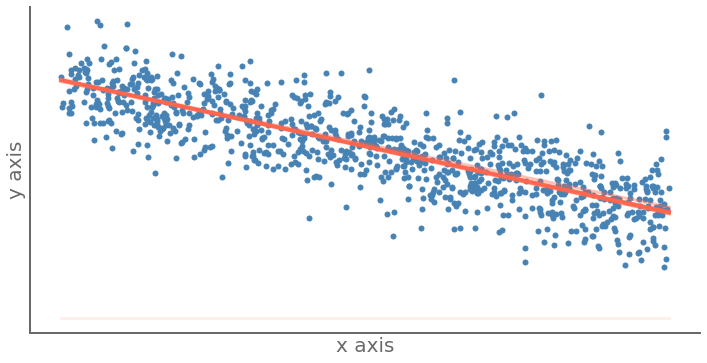

<br>**Loss :**

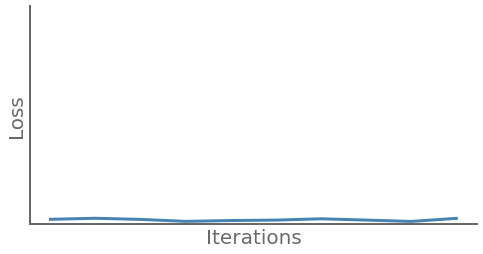

In [5]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [6]:
pwk.end()

End time is : Monday 01 March 2021, 18:40:52
Duration is : 00:00:06 509ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>